In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import pathlib as path
from pydub import AudioSegment
from pydub.utils import make_chunks
import wave

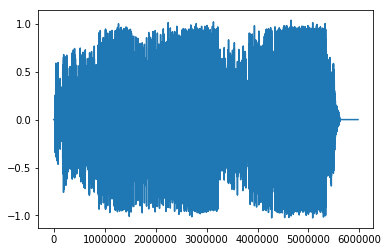

In [4]:
song = r"C:\Users\Mahip\Documents\girls_like_you.mp3"

y, sr = librosa.load(song)
plt.plot(y)

In [5]:
myaudio = AudioSegment.from_file(r"C:\Users\Mahip\Documents\girls_like_you.mp3") 
chunk_length_ms = 5000 # pydub calculates in millisec
chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

#Export all of the individual chunks as wav files
chunks_lists = []
for i, chunk in enumerate(chunks):
    chunk_name = "chunk{0}.wav".format(i)
    print ("exporting", chunk_name)
    chunk.export(chunk_name, format="wav")
    chunks_lists.append(chunk)


exporting chunk0.wav
exporting chunk1.wav
exporting chunk2.wav
exporting chunk3.wav
exporting chunk4.wav
exporting chunk5.wav
exporting chunk6.wav
exporting chunk7.wav
exporting chunk8.wav
exporting chunk9.wav
exporting chunk10.wav
exporting chunk11.wav
exporting chunk12.wav
exporting chunk13.wav
exporting chunk14.wav
exporting chunk15.wav
exporting chunk16.wav
exporting chunk17.wav
exporting chunk18.wav
exporting chunk19.wav
exporting chunk20.wav
exporting chunk21.wav
exporting chunk22.wav
exporting chunk23.wav
exporting chunk24.wav
exporting chunk25.wav
exporting chunk26.wav
exporting chunk27.wav
exporting chunk28.wav
exporting chunk29.wav
exporting chunk30.wav
exporting chunk31.wav
exporting chunk32.wav
exporting chunk33.wav
exporting chunk34.wav
exporting chunk35.wav
exporting chunk36.wav
exporting chunk37.wav
exporting chunk38.wav
exporting chunk39.wav
exporting chunk40.wav
exporting chunk41.wav
exporting chunk42.wav
exporting chunk43.wav
exporting chunk44.wav
exporting chunk45.wa

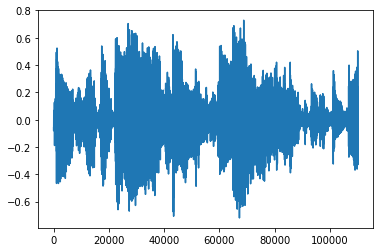

In [6]:
pchunk, sr4= librosa.load("chunk5.wav")
plt.plot(pchunk)

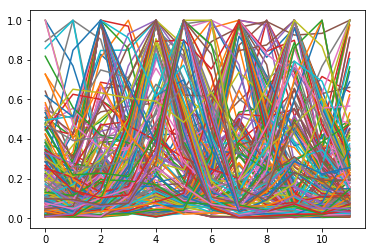

In [7]:
chroma_stft = librosa.feature.chroma_stft(pchunk)
plt.plot(chroma_stft)

In [8]:
chroma_stft.shape

(12, 216)

# Intermediate Conclusion No.1
The shape of chroma tells us how many components the chroma_stft gives us.

It gives us 12 different components of chroma frequencies. That means that we have to take 12 different means
It is a 2d array having 12 feautures.

Taking mean for the array i.e. np.mean(chroma_stft) would give us a single float value, which would actually mean that it had taken the mean of all features. This will lead to loss of features inside the chroma frequencies.

## Furthur steps

1. We have to seperate the 12 features into an array of single features. That is, There will be 12 arrays created containing data of one feature each.

2. We will take seperate mean of every array. Now we have 12 different values.
    Each feature will correspond to one mean value (This is still of a 5 sec chunk, not the whole song)

3. These 12 different values will be then made into a single array of dimentions (12, 1)
        This will mean that we will still have 12 features but one mean value of each feature

In [9]:
#seperating features within chroma frequencies
a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12 = chroma_stft
heavylist = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12]

In [10]:
#taking mean of features seperatly

matrix = [[0]*1 for i in range(12)]

for i in range(12):
    heavylist[i] = np.mean(heavylist[i])

#converting them into a single array    
    
for i in range(12):
    matrix[i][0] = heavylist[i]
    
newarray = np.array(matrix)

newarray

array([[0.20886067],
       [0.15396912],
       [0.29093848],
       [0.26911867],
       [0.47307433],
       [0.35354266],
       [0.28049652],
       [0.46624786],
       [0.32794514],
       [0.30507493],
       [0.22146277],
       [0.24374562]])

## Problem encountered!

The new array which we have made have the correct dimentions but matplotlib takes them as non related values.
Therefore it plots them into seperate value of time.
But we need those 12 mean values at single time instance so we have fix the time scale

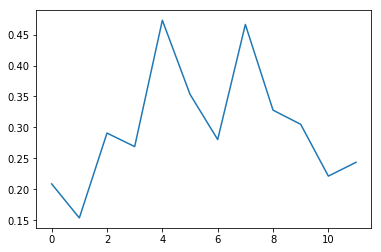

In [12]:
plt.plot(newarray)

## Solution to the problem

Since the time scale was not defined, we explicitly defined time to be 2.5 seconds from the start (average of 0,5)
This particular time was taken because the mean value tend to be somewhere near the middle of time. So a 5 second chunk will have it's 2.5th component to be middle of the chunk.

### Results

All the 12 features of a *SINGLE CHUNK* of the song are successfully plotted at a giving instance of time



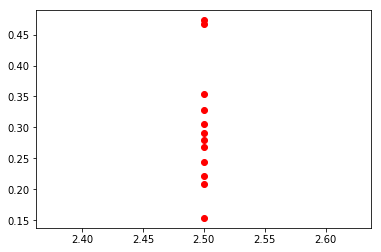

In [11]:
t = [[2.5]*1 for i in range(12)]

plt.plot(t, newarray , 'ro')

# Furthur issues

When we look at the original chroma_stft graph (not meaned), we see one of the twelve features of 5 second chunk is connected via a coloured line to corresponding feauture of another five second chunk.

Now since we have plotted a graph via dots instead of line (as ploting lines will cause all the 12 features to join among themselves), we have to find a way to join corresponding features of different chunks to visually compare them to each other.